In [97]:
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn import *
from sklearn.model_selection import train_test_split
from datetime import datetime, timezone
import missingno as msno
import seaborn as sns
import math


In [98]:
TrialCon = pd.read_csv("Trial1Con.csv")

TrialOx = pd.read_csv("trial1ox.csv")

TrialOxUntouched = pd.read_csv("trial1ox.csv")

TrialConUntouched = pd.read_csv("Trial1Con.csv")

TrialOxWT = TrialOxUntouched

TrialConWT = TrialConUntouched

TrialOxUnix = 1658850534000



TrialCon

,Timestamp,AccelLnX,AccelLNY,AccelLNZ,AccelWRX,AccelWRY,AccelWRZ,GyroX,GyroY,GyroZ,MagX,MagY,MagZ,EventMarker,Unnamed: 14
0,1.658851e+12,-4.380435,-1.815217,-2.978261,-6.980251,-4.064632,-5.266308,0.449785,0.251193,-0.978650,0.886057,0.836582,0.608696,0,NaN
1,1.658851e+12,-4.304348,-1.858696,-2.978261,-6.941951,-4.093357,-5.266308,0.449785,0.388597,-0.825978,0.883058,0.841079,0.619190,-1,NaN
2,1.658851e+12,-4.228261,-1.923913,-3.021739,-6.791143,-4.181927,-5.309396,0.739862,0.541269,-0.352696,0.886057,0.842579,0.610195,-1,NaN
3,1.658851e+12,-4.173913,-1.913043,-2.967391,-6.762418,-4.208259,-5.247157,1.274213,2.235926,0.059518,0.890555,0.848576,0.607196,-1,NaN
4,1.658851e+12,-4.326087,-1.967391,-3.010870,-6.896469,-4.203471,-5.287852,1.228411,2.632872,0.349594,0.890555,0.848576,0.607196,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,1.658851e+12,-6.641304,-0.413043,1.108696,-9.436266,-2.448833,-0.744464,-0.572996,2.015148,-0.700859,1.026987,0.767616,0.368816,-1,NaN
27058,1.658851e+12,-6.619565,-0.434783,1.119565,-9.441053,-2.439258,-0.768402,-0.634065,1.328125,-0.227576,1.047976,0.763118,0.376312,-1,NaN
27059,1.658851e+12,-6.619565,-0.434783,1.152174,-9.419509,-2.467983,-0.766008,-0.679866,1.160186,-0.593989,1.047976,0.763118,0.376312,-1,NaN
27060,1.658851e+12,-6.619565,-0.456522,1.130435,-9.426691,-2.477558,-0.744464,-1.168416,1.007514,-0.884065,1.028486,0.763118,0.368816,-1,NaN


In [99]:
TrialCon['Timestamp'] = (TrialCon['Timestamp']-TrialCon._get_value(0, 'Timestamp'))/1000

TrialCon

,Timestamp,AccelLnX,AccelLNY,AccelLNZ,AccelWRX,AccelWRY,AccelWRZ,GyroX,GyroY,GyroZ,MagX,MagY,MagZ,EventMarker,Unnamed: 14
0,0.000000,-4.380435,-1.815217,-2.978261,-6.980251,-4.064632,-5.266308,0.449785,0.251193,-0.978650,0.886057,0.836582,0.608696,0,NaN
1,0.007812,-4.304348,-1.858696,-2.978261,-6.941951,-4.093357,-5.266308,0.449785,0.388597,-0.825978,0.883058,0.841079,0.619190,-1,NaN
2,0.015625,-4.228261,-1.923913,-3.021739,-6.791143,-4.181927,-5.309396,0.739862,0.541269,-0.352696,0.886057,0.842579,0.610195,-1,NaN
3,0.023437,-4.173913,-1.913043,-2.967391,-6.762418,-4.208259,-5.247157,1.274213,2.235926,0.059518,0.890555,0.848576,0.607196,-1,NaN
4,0.031249,-4.326087,-1.967391,-3.010870,-6.896469,-4.203471,-5.287852,1.228411,2.632872,0.349594,0.890555,0.848576,0.607196,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,211.378562,-6.641304,-0.413043,1.108696,-9.436266,-2.448833,-0.744464,-0.572996,2.015148,-0.700859,1.026987,0.767616,0.368816,-1,NaN
27058,211.386374,-6.619565,-0.434783,1.119565,-9.441053,-2.439258,-0.768402,-0.634065,1.328125,-0.227576,1.047976,0.763118,0.376312,-1,NaN
27059,211.394186,-6.619565,-0.434783,1.152174,-9.419509,-2.467983,-0.766008,-0.679866,1.160186,-0.593989,1.047976,0.763118,0.376312,-1,NaN
27060,211.401999,-6.619565,-0.456522,1.130435,-9.426691,-2.477558,-0.744464,-1.168416,1.007514,-0.884065,1.028486,0.763118,0.368816,-1,NaN


In [100]:
TrialOx['1'] = TrialOx['1']*(192.8/9639)

TrialOxUntouched

,1,2,3,4,5,6,Unnamed: 6,Unnamed: 7
0,0,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
1,1,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
2,2,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
3,3,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
4,4,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9635,9635,-6.380692,-0.235757,-6.616349,-6.144935,NaN,NaN,NaN
9636,9636,-6.447954,-0.247565,-6.695420,-6.200389,NaN,NaN,NaN
9637,9637,-6.463326,-0.256364,-6.719590,-6.206963,NaN,NaN,NaN
9638,9638,-6.520991,-0.235990,-6.756881,-6.285002,NaN,NaN,NaN


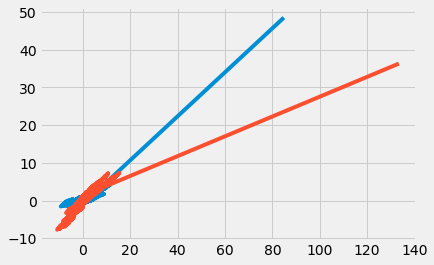

In [101]:
TrialOx
plt.plot(TrialOx['2'], TrialOx['3'], TrialOx['4'], TrialOx['5'])


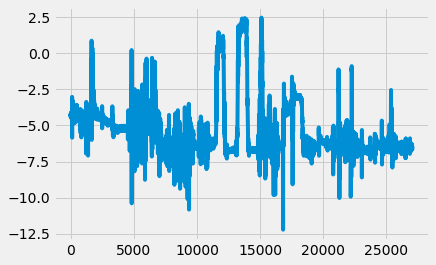

In [102]:
TrialCon
plt.plot(TrialCon['AccelLnX'])

In [103]:
columns = ['Timestamp', 'AccelLnX', 'AccelLNY', 'AccelLNZ', 'AccelWRX', 'AccelWRY',
       'AccelWRZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ',
       'EventMarker']
for col in columns:
    print("plt.plot(Trial1Con['" + col  + "'])")

plt.plot(Trial1Con['Timestamp'])
plt.plot(Trial1Con['AccelLnX'])
plt.plot(Trial1Con['AccelLNY'])
plt.plot(Trial1Con['AccelLNZ'])
plt.plot(Trial1Con['AccelWRX'])
plt.plot(Trial1Con['AccelWRY'])
plt.plot(Trial1Con['AccelWRZ'])
plt.plot(Trial1Con['GyroX'])
plt.plot(Trial1Con['GyroY'])
plt.plot(Trial1Con['GyroZ'])
plt.plot(Trial1Con['MagX'])
plt.plot(Trial1Con['MagY'])
plt.plot(Trial1Con['MagZ'])
plt.plot(Trial1Con['EventMarker'])


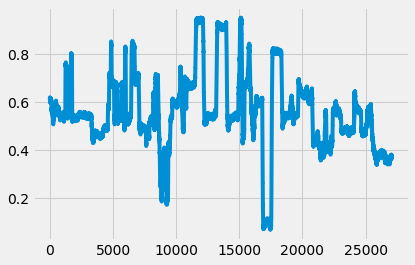

In [104]:
plt.plot(Trial1Con['MagZ'])

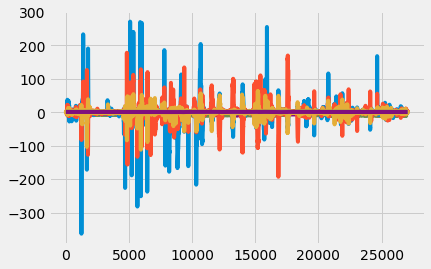

In [105]:
TrialConPlot = TrialCon.drop(axis = 1, labels = ['EventMarker', 'Timestamp', 'Unnamed: 14'])
plt.plot(TrialConPlot)

In [106]:
Trial1Con


#acceLlN:
TrialConMagnitudeAccellNY = ((TrialCon['AccelLnX']**2) + (TrialCon['AccelLNY']**2) + (TrialCon['AccelLNZ']**2))**.5
TrialConMagnitudeAccelWR = ((TrialCon['AccelWRX']**2) + (TrialCon['AccelWRY']**2) + (TrialCon['AccelWRZ']**2))**.5
TrialConMagnitudeGyro = ((TrialCon['GyroX']**2) + (TrialCon['GyroY']**2) + (TrialCon['GyroZ']**2))**.5
TrialConMagnitudeAccellNY

0        5.599398
1        5.554475
2        5.541709
3        5.466873
4        5.625921
           ...   
27057    6.745868
27058    6.727637
27059    6.733141
27060    6.730894
27061    6.709208
Length: 27062, dtype: float64

In [107]:
round((TrialCon['Timestamp']-TrialCon._get_value(0, 'Timestamp'))/7.812012)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
27057    27.0
27058    27.0
27059    27.0
27060    27.0
27061    27.0
Name: Timestamp, Length: 27062, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

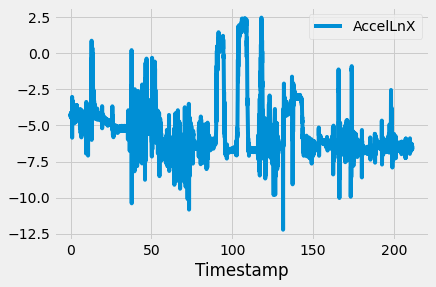

In [108]:
TrialCon.plot('Timestamp', 'AccelLnX')


In [109]:
TrialConV2 = TrialCon.set_index('Timestamp')

TrialOxV2 = TrialOx.set_index('1')

TrialOxV2

,2,3,4,5,6,Unnamed: 6,Unnamed: 7
1,,,,,,,
0.000000,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
0.020002,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
0.040004,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
0.060006,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
0.080008,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192.719992,-6.380692,-0.235757,-6.616349,-6.144935,NaN,NaN,NaN
192.739994,-6.447954,-0.247565,-6.695420,-6.200389,NaN,NaN,NaN
192.759996,-6.463326,-0.256364,-6.719590,-6.206963,NaN,NaN,NaN


# 
Time series graph for the original dataset
------------------------------------------------------




In [110]:
def eventIndicesforOG(trialDF):
    resultingValues = []
    resultingIndices = []
    result = [resultingValues, resultingIndices]


    if 'EventMarker' in trialDF:
        temp = -1
        eventV = trialDF['EventMarker']
        for i in range(len(eventV)):
            if eventV.iloc[i] != 0:
                if eventV.iloc[i] != -1 and eventV.iloc[i]!=temp:
                    resultingValues.append(eventV.iloc[i])
                    resultingIndices.append(i)
                    temp = eventV.iloc[i]
                elif eventV.iloc[i] != temp and eventV.iloc[i-1] == temp:
                    resultingValues.append(eventV.iloc[i-1])
                    resultingIndices.append(i)
        
    if '6' in trialDF:
        eventV = trialDF['6']            
        for i in range(len(eventV)):
            if type(eventV.iloc[i]) != float:
                resultingIndices.append(i)
                resultingValues.append(eventV.iloc[i])
        
    return result

In [111]:
def timeSeriesPlotforOG(df1, col1, df2, col2):
    FPL_cols = [col1, col2]

    fig, (plot1, plot2) = plt.subplots(2, 1, figsize=(25,7), sharex=True)
    
    plot1.plot(df1[FPL_cols[0]])
    plot1.set_ylabel(col1)
    plot2.plot(df2[FPL_cols[1]])
    plot2.set_ylabel(col2)
    
    df1Events = eventIndicesforOG(df1)[1]
    df2Events = eventIndicesforOG(df2)[1]
    

    
    for index in range(len(df1Events)):
        plot1.axvspan(df1Events[index-1], df1Events[index-1]+50, color=sns.xkcd_rgb['red'], alpha=0.5)
        
    for index in range(1, len(df2Events), 2):
        plot2.axvspan(df2Events[index-1], df2Events[index], color=sns.xkcd_rgb['red'], alpha=1)
        

        

# Time Series Plot for Time-fit Data


In [112]:
def eventIndices(trialDF, time):
    resultingIndices = []

    if 'EventMarker' in trialDF:
        temp = -1
        eventV = trialDF['EventMarker']
        for i in range(len(eventV)):
            if eventV.iloc[i] != 0:
                if eventV.iloc[i] != -1 and eventV.iloc[i]!=temp:
                    resultingIndices.append(time[i])
                    temp = eventV.iloc[i]
                elif eventV.iloc[i] != temp and eventV.iloc[i-1] == temp:
                    resultingIndices.append(time[i-1])
        
    if '6' in trialDF:
        eventV = trialDF['Unnamed: 6']            
        for i in range(len(eventV)):
            if type(eventV.iloc[i]) != float:
                resultingIndices.append(time[i])                
        
    return resultingIndices

In [113]:
def timeSeriesPlot(df1, col1, df2, col2, df1timeCol, df2timeCol):
    FPL_cols = [col1, col2]
    
    
    Plot1X = df1[df1timeCol].values.tolist()
    Plot1Y = df1[FPL_cols[0]]
    
    Plot2X = df2[df2timeCol].values.tolist()
    Plot2Y = df2[FPL_cols[1]]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,7), sharex=True)
#     Trial1Con[FPL_cols[0]].plot(subplots=True, ax=axes)
#     Trial1ConV2[FPL_cols[0]].plot(subplots=True)
#     Trial1OxV2[FPL_cols[1]].plot(subplots = True)
    
    
    ax1.plot(Plot1X, Plot1Y)
    ax1.set_ylabel(col1)
    ax2.plot(Plot2X, Plot2Y)
    ax2.set_ylabel(col2)
    
#     df1time = Plot1X[len(Plot1X)-1]
#     df2time = Plot2X[len(Plot2X)-1]

    df1Events = eventIndices(df1, Plot1X)
    df2Events = eventIndices(df2, Plot2X)
            
    for index in range(1, len(df1Events), 2):
        ax1.axvspan(df1Events[index-1], df1Events[index], color=sns.xkcd_rgb['grey'], alpha=0.5)
        
    for index in range(len(df2Events)):
        print(df2Events[index-1])
        ax2.axvspan(df2Events[index-1], (df2Events[index-1])+.5, color=sns.xkcd_rgb['red'], alpha=1)
        
    ax1.axhline(0, color='k', linestyle='-', linewidth=3)
    ax2.axhline(0, color='k', linestyle='-', linewidth=3)

In [114]:
TrialOxWT['1'] = (((TrialOxWT['1']/50))*1000)+TrialOxUnix-831.40


In [115]:
def basicPlot(df1, col1, df2, col2, df1timeCol, df2timeCol):
    FPL_cols = [col1, col2]

    Plot1X = (df1[df1timeCol]).values.tolist()
    Plot1Y = df1[FPL_cols[0]]
    
    Plot2X = df2[df2timeCol].values.tolist()
    Plot2Y = df2[FPL_cols[1]]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,7), sharex=True)
#     Trial1Con[FPL_cols[0]].plot(subplots=True, ax=axes)
#     Trial1ConV2[FPL_cols[0]].plot(subplots=True)
#     Trial1OxV2[FPL_cols[1]].plot(subplots = True)
    
    
    ax1.plot(Plot1X, Plot1Y)
    ax1.set_ylabel(col1)
    ax2.plot(Plot2X, Plot2Y)
    ax2.set_ylabel(col2)
    
    print(Plot1X)

In [116]:
def timeSeriesPlotWT(df1, col1, df2, col2, df1timeCol, df2timeCol):
    FPL_cols = [col1, col2]
    
    
    Plot1X = df1[df1timeCol].values.tolist()
    Plot1Y = df1[FPL_cols[0]]
    
    Plot2X = df2[df2timeCol].values.tolist()
    Plot2Y = df2[FPL_cols[1]]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,7), sharex=True)
#     Trial1Con[FPL_cols[0]].plot(subplots=True, ax=axes)
#     Trial1ConV2[FPL_cols[0]].plot(subplots=True)
#     Trial1OxV2[FPL_cols[1]].plot(subplots = True)
    
    
    ax1.plot(Plot1X, Plot1Y)
    ax1.set_ylabel(col1)
    ax2.plot(Plot2X, Plot2Y)
    ax2.set_ylabel(col2)
    
#     df1time = Plot1X[len(Plot1X)-1]
#     df2time = Plot2X[len(Plot2X)-1]

    df1Events = eventIndices(df1, Plot1X)
    df2Events = eventIndices(df2, Plot2X)
    
            
    for index in range(1, len(df1Events), 2):
        ax1.axvspan(df1Events[index-1], df1Events[index], color=sns.xkcd_rgb['grey'], alpha=0.5)
        
    for index in range(len(df2Events)):
        ax2.axvspan(df2Events[index-1], (df2Events[index-1])+1000, color=sns.xkcd_rgb['red'], alpha=1)
        
    ax1.axhline(0, color='k', linestyle='-', linewidth=3)
    ax2.axhline(0, color='k', linestyle='-', linewidth=3)
    print()
    
    
    
def timeSeriesPlotWTThree(df1, col1, df2, col2, df1timeCol, df2timeCol, df3, col3, df3timeCol, names):
    FPL_cols = [col1, col2, col3]
    
    
    Plot1X = df1[df1timeCol].values.tolist()
    Plot1Y = df1[FPL_cols[0]]
    
    Plot2X = df2[df2timeCol].values.tolist()
    Plot2Y = df2[FPL_cols[1]]
    
    Plot3X = df3[df3timeCol].values.tolist()
    Plot3Y = df3[FPL_cols[2]]

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,7), sharex=True, gridspec_kw={'hspace': 0.5, 'height_ratios': [2, 2, 2]})
#     Trial1Con[FPL_cols[0]].plot(subplots=True, ax=axes)
#     Trial1ConV2[FPL_cols[0]].plot(subplots=True)
#     Trial1OxV2[FPL_cols[1]].plot(subplots = True)
    
    
    ax1.plot(Plot1X, Plot1Y)
    ax1.set_ylabel(names[0])
    
    ax2.plot(Plot2X, Plot2Y)
    ax2.set_ylabel(names[1])
    
    ax3.plot(Plot3X, Plot3Y)
    ax3.set_ylabel(names[2])
    
#     df1time = Plot1X[len(Plot1X)-1]
#     df2time = Plot2X[len(Plot2X)-1]

    df1Events = eventIndices(df1, Plot1X)
    df2Events = eventIndices(df2, Plot2X)
    df3Events = eventIndices(df3, Plot3X)
    
            
    for index in range(1, len(df1Events), 2):
        ax1.axvspan(df1Events[index-1], df1Events[index], color=sns.xkcd_rgb['grey'], alpha=0.5)
        
    for index in range(len(df2Events)):
        ax2.axvspan(df2Events[index-1], (df2Events[index-1])+1000, color=sns.xkcd_rgb['red'], alpha=1)
        
    for index in range(len(df3Events)):
        ax3.axvspan(df3Events[index-1], (df3Events[index-1])+1000, color=sns.xkcd_rgb['blue'], alpha=1)
        
        
    ax1.axhline(0, color='k', linestyle='-', linewidth=3)
    ax2.axhline(0, color='k', linestyle='-', linewidth=3)
    ax3.axhline(0, color='k', linestyle='-', linewidth=3)

    print()
    

In [117]:
MainDisplay = pd.DataFrame(TrialConWT['Timestamp'])
MainDisplay['TrialConMagnitudeAccellNY'] = TrialConMagnitudeAccellNY
MainDisplay['TrialConMagnitudeAccelWR'] = TrialConMagnitudeAccelWR
MainDisplay['TrialConMagnitudeGyro'] = TrialConMagnitudeGyro


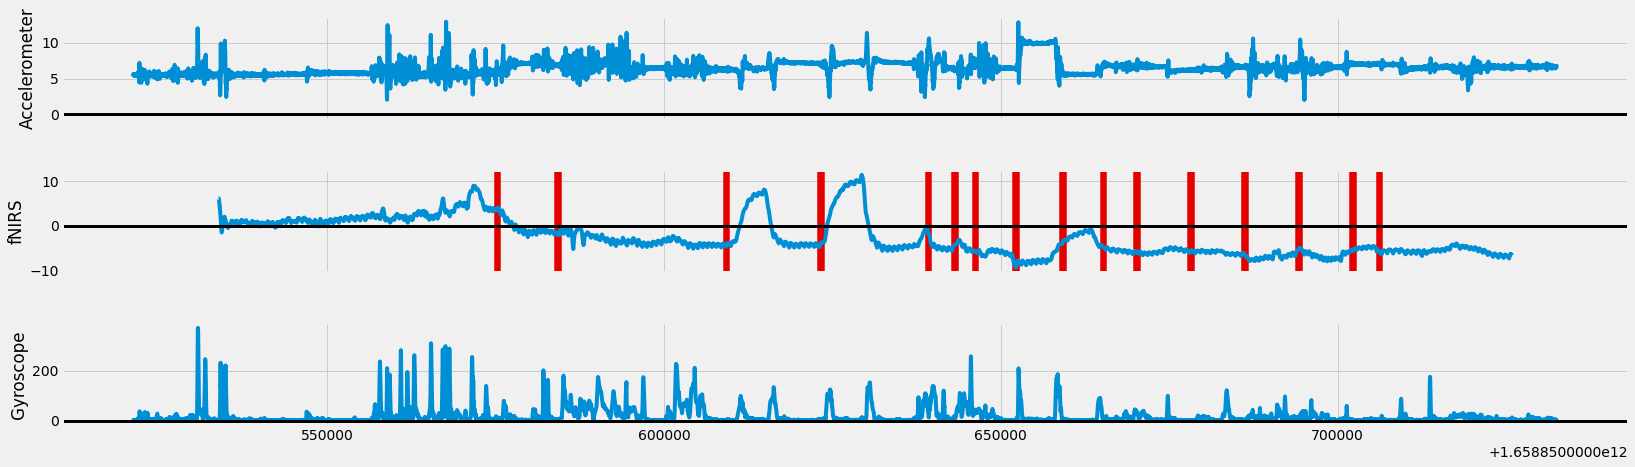

In [118]:

names = ["Accelerometer", "fNIRS", "Gyroscope"]
timeSeriesPlotWTThree(MainDisplay, 'TrialConMagnitudeAccellNY', TrialOxWT.iloc[33:], '2', 'Timestamp', '1', MainDisplay, 'TrialConMagnitudeGyro', 'Timestamp', names)